In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rh_data.csv')

In [4]:
df.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1854,38,No,Travel_Rarely,Sales,22,2,Medical,1,1855,Male,...,0.0,Y,13,8,0,3.0,3,2,1,2
2668,35,No,Travel_Frequently,Sales,7,2,Life Sciences,1,2669,Male,...,1.0,Y,25,8,0,10.0,2,10,0,2
1585,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,1586,Male,...,1.0,Y,12,8,1,5.0,2,5,0,4


In [5]:
df.shape

(4410, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## Identificar nulos

In [7]:
completitud_por_columna = 100 * (1 - df.isnull().mean())
completitud_por_columna

,0
Age,100.000000
Attrition,100.000000
BusinessTravel,100.000000
Department,100.000000
DistanceFromHome,100.000000
Education,100.000000
EducationField,100.000000
EmployeeCount,100.000000
EmployeeID,100.000000
Gender,100.000000


## manejando nulos

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [9]:
columnas_a_imputar = df[['NumCompaniesWorked','TotalWorkingYears']]

In [10]:
df_2 = columnas_a_imputar

In [11]:
df_2[columnas_a_imputar.columns] = imputer.fit_transform(columnas_a_imputar)

<ipython-input-11-03c9ed087b93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[columnas_a_imputar.columns] = imputer.fit_transform(columnas_a_imputar)


In [12]:
completitud_por_columna = 100 * (1 - df_2.isnull().mean())
completitud_por_columna

,0
NumCompaniesWorked,100.0
TotalWorkingYears,100.0


In [13]:
df = df.drop(['NumCompaniesWorked','TotalWorkingYears'],axis=1)

In [14]:
df.sample(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,MaritalStatus,MonthlyIncome,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4125,42,No,Travel_Rarely,Research & Development,17,1,Life Sciences,1,4126,Male,...,Married,99980,Y,24,8,2,3,22,4,14
748,49,Yes,Travel_Frequently,Sales,6,5,Medical,1,749,Female,...,Single,23420,Y,18,8,0,2,4,1,3


In [15]:
df.shape

(4410, 22)

In [16]:
df[df_2.columns] = df_2

In [17]:
df.shape

(4410, 24)

In [18]:
completitud_por_columna = 100 * (1 - df.isnull().mean())
completitud_por_columna


,0
Age,100.0
Attrition,100.0
BusinessTravel,100.0
Department,100.0
DistanceFromHome,100.0
Education,100.0
EducationField,100.0
EmployeeCount,100.0
EmployeeID,100.0
Gender,100.0


## manejar duplicados

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(4410, 24)

## manejar datos fuera del alcance del análisis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

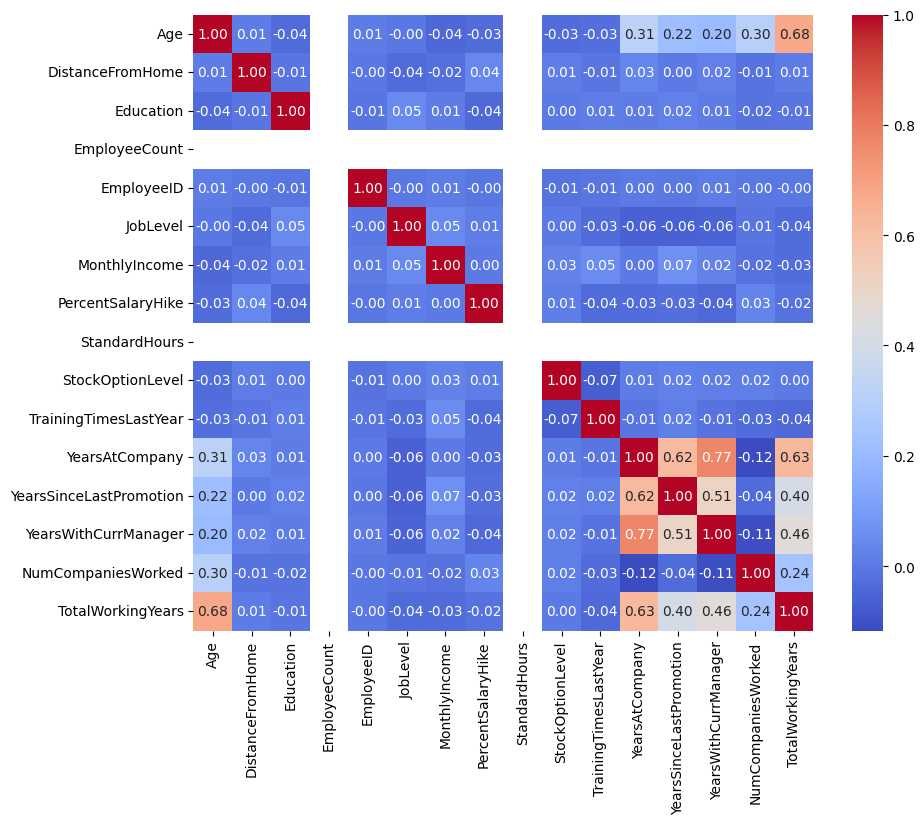

In [22]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Guardar el heatmap como imagen
#plt.savefig('heatmap_correlacion.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico en pantalla
plt.show()

In [23]:
variables_alcance = ['Age','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears','Over18','MaritalStatus','JobRole','Gender','EducationField','Department','BusinessTravel','Attrition']

In [24]:
df = df.filter(items = variables_alcance)


In [25]:
df.shape

(4410, 13)

## manejar variables categoricas

In [26]:
df.select_dtypes(include=['object']).columns

Index(['Over18', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField',
       'Department', 'BusinessTravel', 'Attrition'],
      dtype='object')

In [27]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [28]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [29]:
df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [30]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [32]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [33]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [34]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
df.drop(columns=['Over18'],inplace = True)

In [36]:
df.shape

(4410, 12)

In [37]:
df.describe(include=['object'])

,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Attrition
count,4410,4410,4410,4410,4410,4410,4410
unique,3,9,2,6,3,3,2
top,Married,Sales Executive,Male,Life Sciences,Research & Development,Travel_Rarely,No
freq,2019,978,2646,1818,2883,3129,3699


## manejar variables numéricas

In [38]:
df.select_dtypes(include=['float64','int64'])

,Age,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears
0,51,1,0,0,1.0
1,31,5,1,4,6.0
2,32,5,0,3,5.0
3,38,8,7,5,13.0
4,32,6,0,4,9.0
...,...,...,...,...,...
4405,42,3,0,2,10.0
4406,29,3,0,2,10.0
4407,25,4,1,2,5.0
4408,42,9,7,8,10.0


- identificando outliers

In [39]:
def outliers(df,cols):
  total = {}
  indices_iqr = {}
  for col in cols:
    #IQR
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    INF=Q1-1.5*(IQR)
    SUP=Q3+1.5*(IQR)
    n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
    total[col] = n_outliers
    indices_iqr[col] = list(df[(df[col] < INF) | (df[col] > SUP)].index)
  print(total)
  return indices_iqr


In [40]:
indices = outliers(df,df.select_dtypes(include=['float64','int64']))

{'Age': 0, 'YearsAtCompany': 312, 'YearsSinceLastPromotion': 321, 'YearsWithCurrManager': 42, 'TotalWorkingYears': 189}


- modificando outliers

In [41]:
# Reemplazar outliers con la mediana
def modificar_outliers(df,cols,indices):
  for col in cols:
    median_value = df[col].mean()
    outlier_indices = indices[col]
    df.loc[outlier_indices, col] = median_value
  return df

In [42]:
df = modificar_outliers(df,df.select_dtypes(include=['float64','int64']),indices)

<ipython-input-41-696701f03bf7>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.0081632653061225' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, col] = median_value
<ipython-input-41-696701f03bf7>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.1877551020408164' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, col] = median_value
<ipython-input-41-696701f03bf7>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.12312925170068' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, col] = median_value


In [43]:
indices = outliers(df,df.select_dtypes(include=['float64','int64']))

{'Age': 0, 'YearsAtCompany': 102, 'YearsSinceLastPromotion': 324, 'YearsWithCurrManager': 0, 'TotalWorkingYears': 201}


In [44]:
df.shape

(4410, 12)

## Cambiar tipo de dato

In [45]:
columnas_labelEncoder = ['Gender','Attrition']

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in columnas_labelEncoder:
  df[col] = encoder.fit_transform(df[col])
  df.rename(columns={col: col+'_encoded'}, inplace=True)
df.sample(3)

,Age,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,MaritalStatus,JobRole,Gender_encoded,EducationField,Department,BusinessTravel,Attrition_encoded
3427,55,8.000000,6.000000,7.0,17.0,Married,Sales Executive,0,Life Sciences,Research & Development,Travel_Frequently,0
1390,46,7.008163,2.187755,7.0,24.0,Divorced,Laboratory Technician,0,Technical Degree,Research & Development,Travel_Rarely,0
161,30,5.000000,1.000000,4.0,9.0,Married,Sales Executive,0,Medical,Research & Development,Non-Travel,0


In [47]:
columnas_oneHotEncoder = ['MaritalStatus','EducationField','Department','BusinessTravel','JobRole']

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_columns = pd.DataFrame()
for col in columnas_oneHotEncoder:
    # Aplicar el OneHotEncoder y obtener un DataFrame con las columnas codificadas
    encoded_col = pd.DataFrame(encoder.fit_transform(df[[col]]), columns=encoder.get_feature_names_out([col]))
    # Concatenar al DataFrame de columnas codificadas
    encoded_columns = pd.concat([encoded_columns, encoded_col], axis=1)

# Concatenar las columnas codificadas al DataFrame original (si es necesario)
df = pd.concat([df, encoded_columns], axis=1)

# (Opcional) Eliminar la columna original
df.drop(columnas_oneHotEncoder, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   YearsAtCompany                     4410 non-null   float64
 2   YearsSinceLastPromotion            4410 non-null   float64
 3   YearsWithCurrManager               4410 non-null   float64
 4   TotalWorkingYears                  4410 non-null   float64
 5   Gender_encoded                     4410 non-null   int64  
 6   Attrition_encoded                  4410 non-null   int64  
 7   MaritalStatus_Divorced             4410 non-null   float64
 8   MaritalStatus_Married              4410 non-null   float64
 9   MaritalStatus_Single               4410 non-null   float64
 10  EducationField_Human Resources     4410 non-null   float64
 11  EducationField_Life Sciences       4410 non-null   float

### Dividir en train y test

In [50]:
X =  df.drop(['YearsAtCompany'],axis=1)
y = df['YearsAtCompany']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- crear nuevas variables

In [52]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']

# Crea una nueva columna 'rango_edad' usando pd.cut
df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [53]:
df.columns

Index(['Age', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingYears', 'Gender_encoded',
       'Attrition_encoded', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative', 'Age_Range'],
      dtype='object')

- EDA

In [54]:
# Agrupar datos
agrupados = df.groupby('Age_Range').mean()  # Puedes usar otras funciones como sum(), count(), etc.
print(agrupados)


                 Age  YearsAtCompany  YearsSinceLastPromotion  \
Age_Range                                                       
0-18             NaN             NaN                      NaN   
19-35      28.886329        5.227343                 1.345246   
36-50      40.503096        6.363164                 1.634410   
51-65      53.803468        6.192167                 1.887319   
66+              NaN             NaN                      NaN   

           YearsWithCurrManager  TotalWorkingYears  Gender_encoded  \
Age_Range                                                            
0-18                        NaN                NaN             NaN   
19-35                  3.420891           6.655914        0.620584   
36-50                  4.467850          13.011348        0.582043   
51-65                  4.505737          14.420853        0.589595   
66+                         NaN                NaN             NaN   

           Attrition_encoded  MaritalStatus_Divorced 

<ipython-input-54-a2029e92f97c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupados = df.groupby('Age_Range').mean()  # Puedes usar otras funciones como sum(), count(), etc.


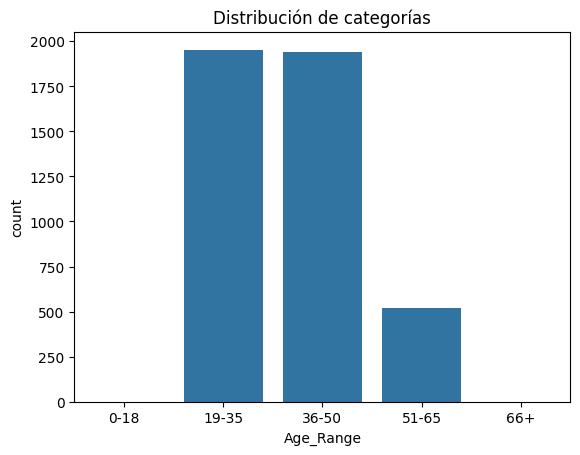

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras
sns.countplot(x='Age_Range', data=df)
plt.title('Distribución de categorías')
plt.show()


In [56]:
# Media
media = df['Age'].mean()
print(f'Media: {media}')

# Mediana
mediana = df['Age'].median()
print(f'Mediana: {mediana}')

# Moda
moda = df['Age'].mode()[0]
print(f'Moda: {moda}')


Media: 36.923809523809524
Mediana: 36.0
Moda: 35


In [57]:
df.describe()

,Age,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Gender_encoded,Attrition_encoded,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,...,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,5.840033,1.536116,4.008656,10.362679,0.600000,0.161224,0.222449,0.457823,0.319728,...,0.709524,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,9.133301,3.889033,1.931248,3.365782,6.303151,0.489954,0.367780,0.415938,0.498274,0.466424,...,0.454034,0.284943,0.184745,0.381025,0.254141,0.298211,0.226874,0.399021,0.415483,0.230839
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,3.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,5.000000,1.000000,3.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,8.000000,2.187755,7.000000,13.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,18.000000,7.000000,14.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


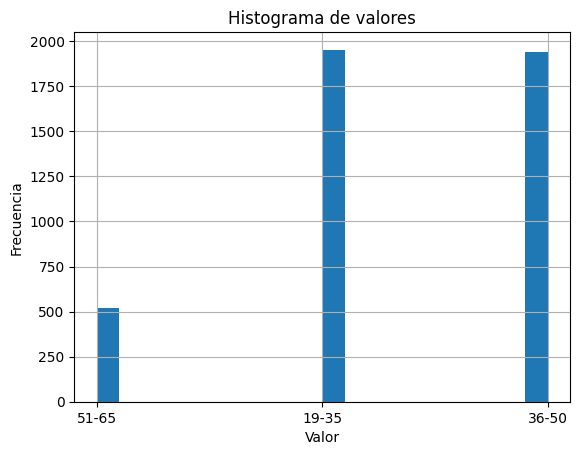

In [58]:
# Histograma
df['Age_Range'].hist(bins=20)
plt.title('Histograma de valores')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()



In [59]:
# Desviación estándar
desviacion_estandar = df['Age'].std()
print(f'Desviación estándar: {desviacion_estandar}')

# Rango intercuartílico
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print(f'Rango intercuartílico: {iqr}')


Desviación estándar: 9.133301271011144
Rango intercuartílico: 13.0


## Algoritmos de ML
- Regresion logistica -> datos discretos
- Regresióm Lineal -> datos continuos
- Random Forest -> problemas de clasificación principalmente y regresion(prediccion)
- XGBoost -> problemas de clasificación (XGBClassifier) principalmente y regresión


In [60]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [62]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

y_train = np.floor(y_train).astype(int)
y_test = np.floor(y_test).astype(int)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.691609977324263
